In [3]:
#KNN
import numpy as np
from collections import Counter

X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # Training features
y_train = np.array([0, 1, 1, 0])                      # Training labels
X_test = np.array([[2, 3], [4, 5]])                   # Test features


In [4]:
def knn_predict(X_train, y_train, X_test, k):
    # Function to calculate Euclidean distance
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    # List to store all our predictions
    predictions = []

    # Iterate over each test point
    for test_point in X_test:
        # Calculate distances between the test point and all training points
        distances = [euclidean_distance(test_point, x) for x in X_train]

        # Sort distances and return indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return predictions

In [5]:
# Making predictions
k = 3  # number of neighbors
predictions = knn_predict(X_train, y_train, X_test, k)

# Print predictions
print("Predictions:", predictions)

# If you have test labels, you can calculate accuracy
# y_test = np.array([...])  # Actual test labels
# accuracy = np.mean(predictions == y_test)
# print("Accuracy:", accuracy)

Predictions: [1, 1]


In [6]:
#K means

import numpy as np
# Example dataset
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])


In [7]:
class KMeans:
    def __init__(self, k=2, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    def initialize_centroids(self, X):
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.k]]
        return centroids

    def closest_centroid(self, X, centroids):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def compute_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iterations):
            self.labels = self.closest_centroid(X, self.centroids)
            new_centroids = self.compute_centroids(X, self.labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        return self.centroids, self.labels


In [8]:
kmeans = KMeans(k=3)
centroids, labels = kmeans.fit(X)

print("Centroids:\n", centroids)
print("Labels:\n", labels)


Centroids:
 [[1.25       1.9       ]
 [1.         0.6       ]
 [7.33333333 9.        ]]
Labels:
 [0 0 2 2 1 2]


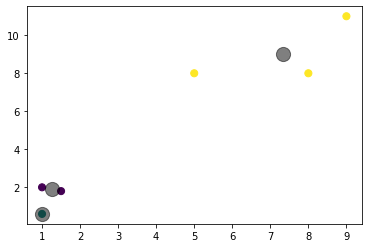

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.show()
